In [8]:
import pylab as plt 
import pandas as pd
import numpy as np
from astropy.constants import R_earth, m_e, c
from astropy import units
from tqdm import tqdm
from scipy.constants import elementary_charge

In [9]:
from plotting_utils import add_earth

In [10]:
def plot(df_sub, fname=None):
    plt.figure(figsize=(10, 5))
    plt.subplot(121)
    cmap = plt.get_cmap('viridis')
    for i in [0]:#range(50, 500, 50):
        plt.scatter(df_sub[f'x{i}'], df_sub[f'z{i}'], c=cmap(np.linspace(0, 1, len(df_sub.index))))

    plt.xlabel('X (SM)')
    plt.ylabel('Z (SM)')
    plt.axhline(0, color='k')
    plt.axvline(0, color='k')
    plt.xlim(-1, 7)
    plt.ylim(-3, 3)
    add_earth()
    plt.gca().set_aspect("equal")
        
    plt.subplot(122)
    cmap = plt.get_cmap('viridis')
    for i in [0]:#range(50, 500, 50):
        plt.scatter(df_sub[f'x{i}'], df_sub[f'y{i}'], c=cmap(np.linspace(0, 1, len(df_sub.index))))

    plt.xlabel('X (SM)')
    plt.ylabel('Y (SM)')
    plt.xlim(-1, 7)
    plt.ylim(-7, 7)
    plt.axhline(0, color='k')
    plt.axvline(0, color='k')
    add_earth()
    plt.gca().set_aspect("equal")
    
    if fname:
        plt.savefig(fname)
        plt.close()


In [18]:
df = pd.read_csv('data/test_dipole.csv')
print(len(df.index))

392


In [19]:
df.head()

,Unnamed: 0,t0,x0,y0,z0,ppar0,B0,W0,h0,t50,...,W400,h400,t450,x450,y450,z450,ppar450,B450,W450,h450
0,0,0.092272,6.000000,0.001046,0.031458,0.408248,-11.056770,0.197480,0.008842,0.092282,...,0.196831,0.008854,0.092364,6.013500,0.001050,0.031508,0.408248,-10.984556,0.196750,0.008856
1,1,0.180293,6.000000,0.002045,0.061466,0.408248,-11.056726,0.197479,0.008782,0.180319,...,0.196831,0.008794,0.180525,6.013500,0.002051,0.061583,0.408248,-10.984512,0.196750,0.008796
2,2,0.268088,5.999999,0.003040,0.091397,0.408248,-11.056683,0.197479,0.008779,0.268130,...,0.196831,0.008791,0.268463,6.013499,0.003051,0.091581,0.408248,-10.984469,0.196750,0.008793
3,3,0.355876,5.998952,0.004035,0.121297,0.408077,-11.062623,0.197480,0.008780,0.355934,...,0.196829,0.008793,0.356394,6.012452,0.004049,0.121547,0.408078,-10.990024,0.196748,0.008794
4,4,0.443692,5.997456,0.005029,0.151177,0.407831,-11.071132,0.197482,0.008784,0.443765,...,0.196826,0.008796,0.444352,6.010955,0.005046,0.151495,0.407835,-10.997982,0.196745,0.008798


Text(0.5, 0, 'Time (seconds)')

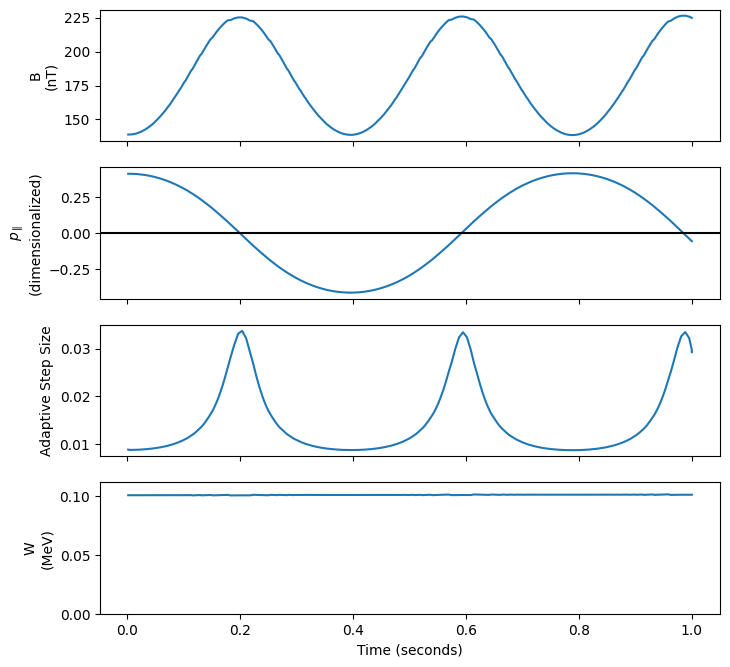

In [20]:
sf = c / R_earth
t = (df['t0'].values / sf).to(units.s).value

q = - elementary_charge * units.C
sf = (q * R_earth / (m_e * c**2))
B = (df['B0'].values * units.s/ R_earth / sf).to(units.nT)

p = df['ppar0'].values
W = (df['W0'].values * (m_e * c**2)).to(units.MeV).value

fig, axes = plt.subplots(4, 1,sharex=True, figsize=(8, 8), dpi=100)
axes[0].plot(t, B, '-')
axes[0].set_ylabel('B\n(nT)')
axes[1].plot(t, p, '-')
axes[1].set_ylabel(r'$p_\parallel$' +'\n(dimensionalized)')
axes[1].axhline(0, color='k')
axes[2].plot(t, df['h0'], '-')
axes[2].set_ylabel('Adaptive Step Size')
axes[3].plot(t, W, '-')
axes[3].set_ylabel('W\n(MeV)')
axes[3].set_ylim(0, W.max() * 1.1)
axes[3].set_xlabel('Time (seconds)')

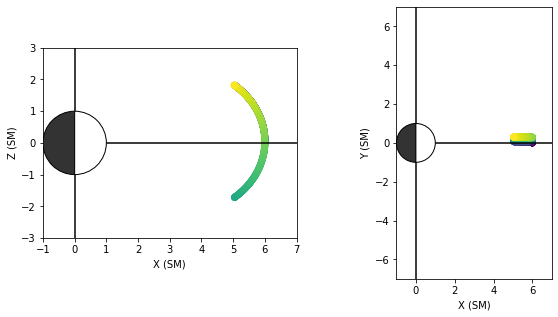

In [7]:
plot(df)

In [ ]:
import joblib
tasks = []

for i in range(len(df.index)):
    tasks.append(joblib.delayed(plot)(df.iloc[i:i+100], 'plots/%04d.png' % i))
    
print(f'Tasks: {len(tasks)}')

joblib.Parallel(n_jobs=-1, verbose=1)(tasks)

Tasks: 81671


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   36.7s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 8442 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 9792 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 11242 tasks      |